In [18]:
# Read libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Import Movies Dataset
movie_data = pd.read_csv("movies.csv")
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Import Ratings Dataset
ratings_data = pd.read_csv("ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [5]:
# Genre
movies_genre = pd.DataFrame(movie_data["genres"])
movies_genre[:10]

,genres
0,Adventure|Animation|Children|Comedy|Fantasy
1,Adventure|Children|Fantasy
2,Comedy|Romance
3,Comedy|Drama|Romance
4,Comedy
5,Action|Crime|Thriller
6,Comedy|Romance
7,Adventure|Children
8,Action
9,Action|Adventure|Thriller


In [7]:
# Splitting genre for each movie to a new dataframe
type(movies_genre)
movies_genre2 = pd.DataFrame()
movies_genre2[["1","2","3","4","5","6","7","8","9","10"]] = movies_genre.genres.str.split("|",expand=True)
movies_genre2.head()

,1,2,3,4,5,6,7,8,9,10
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


In [10]:
# Zero matrix
mat = np.zeros( (len(movie_data)+1, 18))
list_genre = ["Action", "Adventure", "Animation", "Children", 
                "Comedy", "Crime","Documentary", "Drama", "Fantasy",
                "Film-Noir", "Horror", "Musical", "Mystery","Romance",
                "Sci-Fi", "Thriller", "War", "Western"]
# Vertically stack genre and zero matrix
mat = np.vstack((list_genre,mat))

for index in range(0,len(movies_genre2)):
     for col in range(0,9):
             gen_col = np.where(mat[0,] == movies_genre2.iloc[index,col]) #Author DataFlair
             mat[index+1,gen_col] = 1

mat= mat[1:,]
mat

array([['0.0', '1', '1', ..., '0.0', '0.0', '0.0'],
       ['0.0', '1', '0.0', ..., '0.0', '0.0', '0.0'],
       ['0.0', '0.0', '0.0', ..., '0.0', '0.0', '0.0'],
       ...,
       ['0.0', '0.0', '0.0', ..., '0.0', '0.0', '0.0'],
       ['0.0', '0.0', '0.0', ..., '0.0', '0.0', '0.0'],
       ['0.0', '0.0', '0.0', ..., '0.0', '0.0', '0.0']], dtype='<U32')

In [14]:
mat2=pd.DataFrame(mat)
# Adding title column to the genre dataframe
searchData = pd.concat([movie_data.iloc[:,1:2],mat2],axis=1)
searchData.columns = ["Title","Action", "Adventure", "Animation", "Children","Comedy", "Crime","Documentary", "Drama", "Fantasy","Film-Noir", "Horror", "Musical", "Mystery","Romance","Sci-Fi", "Thriller", "War", "Western"]

user_rating = pd.crosstab(index=ratings_data['userId'],columns=ratings_data['movieId'],values=ratings_data['rating'],aggfunc=sum)
user_rating


movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Merging the movies and ratings dataframe
df = pd.merge(ratings_data,movie_data,on = 'movieId')
df

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama
...,...,...,...,...,...,...
105334,668,140098,2.5,1450415424,Runoff (2015),Drama
105335,668,140816,2.5,1443288791,Tangerine (2015),Comedy|Drama
105336,668,141472,2.5,1442679119,The 50 Year Argument (2014),(no genres listed)
105337,668,142488,4.0,1451535844,Spotlight (2015),Thriller


In [19]:
# Top 5 movies with the highest mean rating
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Being Human (1993)                   5.0
Three Ages (1923)                    5.0
The Liberator (2013)                 5.0
October Baby (2011)                  5.0
Resident Evil: Retribution (2012)    5.0
Name: rating, dtype: float64

In [23]:
# Top 5 movies with the most number of user ratings
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

In [29]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


In [30]:
ratings['No. of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,No. of ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


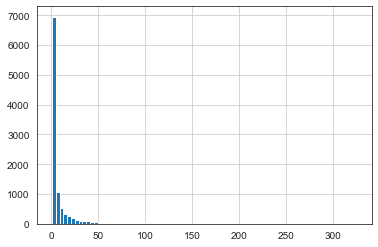

In [32]:
ratings['No. of ratings'].hist(bins=80)

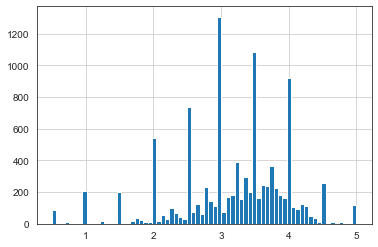

In [37]:
ratings['rating'].hist(bins=70)

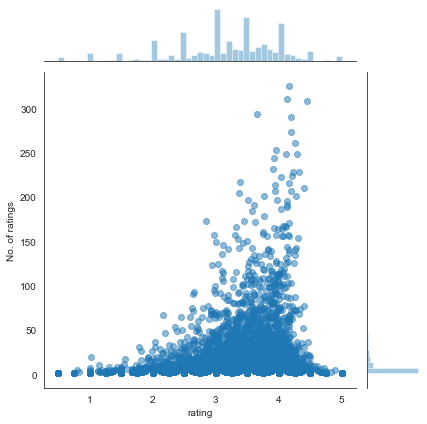

In [39]:
sns.jointplot(x='rating',y='No. of ratings',data=ratings,alpha=0.5)

In [26]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
ratings.sort_values('No. of ratings',ascending=False).head(10)

,rating,No. of ratings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290
Star Wars: Episode IV - A New Hope (1977),4.188645,273
"Matrix, The (1999)",4.264368,261
Terminator 2: Judgment Day (1991),3.960474,253
Braveheart (1995),4.108871,248


In [38]:
# Extract ratings for movie Pulp Fiction
pulp_fiction_ratings = moviemat['Pulp Fiction (1994)']
pulp_fiction_ratings.head()

userId
1    4.0
2    NaN
3    5.0
4    4.0
5    NaN
Name: Pulp Fiction (1994), dtype: float64

In [40]:
# Suggestions for movies similar to Pulp Fiction
similar_to_pulp = moviemat.corrwith(pulp_fiction_ratings)
corr_pulp = pd.DataFrame(similar_to_pulp,columns=['Correlation'])
corr_pulp.dropna(inplace=True)
corr_pulp = corr_pulp.join(ratings['No. of ratings'])
corr_pulp[corr_pulp['No. of ratings']>100].sort_values('Correlation',ascending=False).head()

c:\users\karke\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\karke\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,No. of ratings
title,,
Pulp Fiction (1994),1.000000,325
Being John Malkovich (1999),0.542833,124
Reservoir Dogs (1992),0.472520,131
Kill Bill: Vol. 1 (2003),0.442408,110
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),0.406999,125
